# Final Project Report

* Class: DS 5100
* Student Name: Tomas Tsega
* Student Net ID: hhn5nx@virginia.edu
* This URL: https://github.com/tsegatomas/Final-Project-DS5100.git

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/tsegatomas/Final-Project-DS5100.git

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
# A code block with your classes.

      '''
      import os
import numpy as np
import pandas as pd

class Die:
    """
    A class representing a die with N sides, each side having a unique symbol and weight.
    """
    def __init__(self, faces):
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array.")
        if len(faces) != len(set(faces)):
            raise ValueError("Faces must be distinct values.")
        
        self._faces = faces
        self._weights = np.ones(len(faces))  # Default weight of 1.0 for each face
        self._die_df = pd.DataFrame({
            'face': faces,
            'weight': self._weights
        }).set_index('face')

    def change_weight(self, face, new_weight):
        if face not in self._die_df.index:
            raise IndexError("Face value not found in die.")
        if not isinstance(new_weight, (int, float)) or new_weight < 0:
            raise TypeError("Weight must be a positive numeric value.")
        
        self._die_df.at[face, 'weight'] = float(new_weight)

    def roll(self, rolls=1):
        return self._die_df.sample(n=rolls, weights='weight', replace=True).index.tolist()
    
    def show(self):
        return self._die_df.copy()


class Game:
    """
    A class representing a game consisting of rolling one or more dice.
    """
    def __init__(self, dice):
        if not isinstance(dice, list) or not all(isinstance(die, Die) for die in dice):
            raise TypeError("All elements must be Die objects.")
        self.dice = dice
        self._results = None

    def play(self, rolls=1):
        results = {f"Die_{i}": die.roll(rolls) for i, die in enumerate(self.dice)}
        self._results = pd.DataFrame(results)
        self._results.index.name = 'Roll'

    def show(self, form='wide'):
        if self._results is None:
            raise ValueError("No results available. Please play the game first.")
        if form == 'wide':
            return self._results
        elif form == 'narrow':
            return self._results.stack().to_frame('Outcome')
        else:
            raise ValueError("Invalid form. Use 'wide' or 'narrow'.")


class Analyzer:
    """
    A class for analyzing the results of a game of dice.
    """
    def __init__(self, game):
        if not isinstance(game, Game):
            raise TypeError("Input must be a Game object.")
        self.game = game
        self.results = game.show(form='wide')

    def jackpot(self):
        return (self.results.nunique(axis=1) == 1).sum()

    def face_counts_per_roll(self):
        return self.results.apply(pd.Series.value_counts, axis=1).fillna(0)

    def combo_count(self):
        sorted_rolls = self.results.apply(lambda x: tuple(sorted(x)), axis=1)
        return sorted_rolls.value_counts().to_frame('Count')

    def permutation_count(self):
        perm_rolls = self.results.apply(lambda x: tuple(x), axis=1)
        return perm_rolls.value_counts().to_frame('Count')

    def scrabble_word_analysis(self, word_list):
        valid_words = []
        for roll in self.results.apply(lambda x: ''.join(sorted(x)), axis=1):
            if roll in word_list:
                valid_words.append(True)
            else:
                valid_words.append(False)
        
        return pd.DataFrame({'Roll': self.results.index, 'Is_Valid_Word': valid_words})

    def letter_frequency_analysis(self, letter_frequencies):
        rolled_letter_counts = self.results.apply(pd.Series.value_counts).sum().fillna(0)
        comparison = pd.DataFrame({'Rolled_Count': rolled_letter_counts})
        comparison['Expected_Frequency'] = comparison.index.map(letter_frequencies)
        comparison['Expected_Frequency'] = comparison['Expected_Frequency'].fillna(0)
        return comparison


# Adjust file paths for scrabble words and English letter frequencies
current_dir = os.path.dirname(__file__)
scrabble_words_path = os.path.join(current_dir, 'scrabble_words.txt')
english_letters_path = os.path.join(current_dir, 'english_letters.txt')

# Load scrabble words
try:
    with open(scrabble_words_path) as f:
        scrabble_words = [line.strip() for line in f]
except FileNotFoundError:
    raise FileNotFoundError(f"Could not find scrabble_words.txt at {scrabble_words_path}")

# Load English letter frequencies
try:
    letter_frequencies = {}
    with open(english_letters_path) as f:
        for line in f:
            letter, frequency = line.strip().split()
            letter_frequencies[letter] = float(frequency)
except FileNotFoundError:
    raise FileNotFoundError(f"Could not find english_letters.txt at {english_letters_path}")
    '''

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
# A code block with your test code.
'''
# In[1]:





# In[2]:


import unittest
import numpy as np
import pandas as pd
from montecarlo_simulator.montecarlo import Die, Game, Analyzer

class TestDie(unittest.TestCase):
    def setUp(self):
        self.faces = np.array([1, 2, 3, 4, 5, 6])
        self.die = Die(self.faces)

    def test_initialization(self):
        with self.assertRaises(TypeError):
            Die([1, 2, 3])  # Not a NumPy array
        with self.assertRaises(ValueError):
            Die(np.array([1, 1, 2]))  # Non-unique faces

    def test_change_weight(self):
        self.die.change_weight(1, 3.0)
        self.assertEqual(self.die.show().at[1, 'weight'], 3.0)
        with self.assertRaises(IndexError):
            self.die.change_weight(7, 2.0)  # Face does not exist
        with self.assertRaises(TypeError):
            self.die.change_weight(1, 'high')  # Invalid weight type

    def test_roll(self):
        outcomes = self.die.roll(10)
        self.assertEqual(len(outcomes), 10)
        self.assertTrue(all(face in self.faces for face in outcomes))

    def test_show(self):
        state = self.die.show()
        self.assertEqual(state.shape, (6, 1))  # 6 faces, 1 weight column


class TestGame(unittest.TestCase):
    def setUp(self):
        self.die1 = Die(np.array(['A', 'B', 'C', 'D', 'E', 'F']))
        self.die2 = Die(np.array(['A', 'B', 'C', 'D', 'E', 'F']))
        self.game = Game([self.die1, self.die2])

    def test_initialization(self):
        with self.assertRaises(TypeError):
            Game(['not_a_die'])  # Invalid list of Die objects

    def test_play(self):
        self.game.play(5)
        results = self.game.show()
        self.assertEqual(results.shape, (5, 2))  # 5 rolls, 2 dice

    def test_show(self):
        self.game.play(5)
        wide_results = self.game.show('wide')
        self.assertEqual(wide_results.shape, (5, 2))
        narrow_results = self.game.show('narrow')
        self.assertEqual(narrow_results.shape, (10, 1))  # 5 rolls * 2 dice
        with self.assertRaises(ValueError):
            self.game.show('invalid')  # Invalid form argument


class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        die1 = Die(np.array(['A', 'B', 'C']))
        die2 = Die(np.array(['A', 'B', 'C']))
        self.game = Game([die1, die2])
        self.game.play(5)
        self.analyzer = Analyzer(self.game)

    def test_initialization(self):
        with self.assertRaises(TypeError):
            Analyzer('not_a_game')  # Not a Game object

    def test_jackpot(self):
        jackpots = self.analyzer.jackpot()
        self.assertTrue(isinstance(jackpots, (int, np.integer)), f"Expected jackpots to be an int, but got {type(jackpots)}")
        self.assertGreaterEqual(jackpots, 0)

    def test_face_counts_per_roll(self):
        face_counts = self.analyzer.face_counts_per_roll()
        self.assertEqual(face_counts.shape[0], 5)  # 5 rolls
        self.assertTrue(all(col in ['A', 'B', 'C'] for col in face_counts.columns))

    def test_combo_count(self):
        combo_counts = self.analyzer.combo_count()
        self.assertIsInstance(combo_counts, pd.DataFrame)

    def test_permutation_count(self):
        permutation_counts = self.analyzer.permutation_count()
        self.assertIsInstance(permutation_counts, pd.DataFrame)

    def test_scrabble_word_analysis(self):
        scrabble_words = ['AA', 'BB', 'CC']
        analysis = self.analyzer.scrabble_word_analysis(scrabble_words)
        self.assertEqual(analysis.shape[0], 5)  # 5 rolls
        self.assertIn('Is_Valid_Word', analysis.columns)

    def test_letter_frequency_analysis(self):
        letter_frequencies = {'A': 8, 'B': 3, 'C': 5}
        frequency_analysis = self.analyzer.letter_frequency_analysis(letter_frequencies)
        self.assertTrue(all(col in ['Rolled_Count', 'Expected_Frequency'] for col in frequency_analysis.columns))


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [6]:
# e.g. import montecarlo.montecarlo 
import numpy as np
from montecarlo_simulator.montecarlo import Die, Game, Analyzer

try:
    die = Die(np.array(['A', 'B', 'C']))
    print("Die successfully created!")
except Exception as e:
    print(f"Die creation failed: {e}")

try:
    game = Game([die, die])
    game.play(5)  # Play the game with 5 rolls
    print("Game successfully created and played!")
except Exception as e:
    print(f"Game creation or play failed: {e}")

try:
    analyzer = Analyzer(game)
    print("Analyzer successfully created!")
except Exception as e:
    print(f"Analyzer creation failed: {e}")





Die successfully created!
Game successfully created and played!
Analyzer successfully created!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
# help(montecarlo)
'''
Help for Die class:
Help on class Die in module montecarlo_simulator.montecarlo:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  A class representing a die with N sides, each side having a unique symbol and weight.
 |  
 |  Attributes:
 |      _faces (np.ndarray): An array containing the faces of the die.
 |      _weights (np.ndarray): An array containing the weights associated with each face.
 |      _die_df (pd.DataFrame): A private DataFrame storing faces and weights.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Initialize the Die object with faces and default weights.
 |      
 |      Args:
 |          faces (np.ndarray): A NumPy array of unique symbols representing the faces of the die.
 |      
 |      Raises:
 |          TypeError: If faces is not a NumPy array.
 |          ValueError: If faces contain duplicate values.
 |  
 |  change_weight(self, face, new_weight)
 |      Change the weight of a specific face on the die.
 |      
 |      Args:
 |          face: The face whose weight is to be changed.
 |          new_weight (float): The new weight to assign to the face.
 |      
 |      Raises:
 |          IndexError: If the face is not found in the die.
 |          TypeError: If the new weight is not a positive numeric value.
 |  
 |  roll(self, rolls=1)
 |      Roll the die one or more times.
 |      
 |      Args:
 |          rolls (int): Number of times the die should be rolled. Defaults to 1.
 |      
 |      Returns:
 |          list: A list of outcomes for each roll.
 |  
 |  show(self)
 |      Show the current state of the die.
 |      
 |      Returns:
 |          pd.DataFrame: A DataFrame with the faces and their respective weights.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)


Help for Game class:
Help on class Game in module montecarlo_simulator.montecarlo:

class Game(builtins.object)
 |  Game(dice)
 |  
 |  A class representing a game consisting of rolling one or more dice.
 |  
 |  Attributes:
 |      dice (list): A list of Die objects used in the game.
 |      _results (pd.DataFrame): A private DataFrame storing the results of the game.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dice)
 |      Initialize the Game with a list of dice.
 |      
 |      Args:
 |          dice (list): A list of Die objects.
 |      
 |      Raises:
 |          TypeError: If the input is not a list of Die objects.
 |  
 |  play(self, rolls=1)
 |      Play the game by rolling all dice a specified number of times.
 |      
 |      Args:
 |          rolls (int): Number of times to roll the dice.
 |      
 |      Returns:
 |          None
 |  
 |  show(self, form='wide')
 |      Show the results of the most recent play.
 |      
 |      Args:
 |          form (str): Format of the results, either 'wide' or 'narrow'. Defaults to 'wide'.
 |      
 |      Returns:
 |          pd.DataFrame: The results in the specified format.
 |      
 |      Raises:
 |          ValueError: If no results are available or the format is invalid.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)


Help for Analyzer class:
Help on class Analyzer in module montecarlo_simulator.montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |  
 |  A class for analyzing the results of a game of dice.
 |  
 |  Attributes:
 |      game (Game): The Game object to analyze.
 |      results (pd.DataFrame): The results of the game in wide format.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game)
 |      Initialize the Analyzer with a Game object.
 |      
 |      Args:
 |          game (Game): The Game object to analyze.
 |      
 |      Raises:
 |          TypeError: If the input is not a Game object.
 |  
 |  combo_count(self)
 |      Compute the distinct combinations of faces rolled, order-independent.
 |      
 |      Returns:
 |          pd.DataFrame: A DataFrame with combinations and their counts.
 |  
 |  face_counts_per_roll(self)
 |      Compute how many times each face was rolled per event.
 |      
 |      Returns:
 |          pd.DataFrame: A DataFrame with face counts for each roll.
 |  
 |  jackpot(self)
 |      Compute the number of jackpots (all faces are the same).
 |      
 |      Returns:
 |          int: The number of jackpots.
 |  
 |  permutation_count(self)
 |      Compute the distinct permutations of faces rolled, order-dependent.
 |      
 |      Returns:
 |          pd.DataFrame: A DataFrame with permutations and their counts.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/tsegatomas/Final-Project-DS5100.git

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [7]:
import numpy as np
from montecarlo_simulator.montecarlo import Die

# Fair coin with equal weights for 'H' and 'T'
fair_coin = Die(np.array(['H', 'T']))
print("Fair coin created:", fair_coin.show())

# Unfair coin with weight 5 for 'H' and 1 for 'T'
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)
print("Unfair coin created:", unfair_coin.show())


Fair coin created:       weight
face        
H        1.0
T        1.0
Unfair coin created:       weight
face        
H        5.0
T        1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
from montecarlo_simulator.montecarlo import Game

# Create a game with two fair coins
game_fair = Game([fair_coin, fair_coin])
game_fair.play(rolls=1000)
print("Game with two fair coins played. Results:\n", game_fair.show(form='wide'))


Game with two fair coins played. Results:
      Die_0 Die_1
Roll            
0        H     H
1        T     T
2        T     T
3        H     H
4        H     H
...    ...   ...
995      T     T
996      H     T
997      H     H
998      T     H
999      T     T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
# Create a game with two unfair coins and one fair coin
game_unfair = Game([unfair_coin, unfair_coin, fair_coin])
game_unfair.play(rolls=1000)
print("Game with two unfair coins and one fair coin played. Results:\n", game_unfair.show(form='wide'))


Game with two unfair coins and one fair coin played. Results:
      Die_0 Die_1 Die_2
Roll                  
0        T     H     T
1        H     H     H
2        H     H     T
3        H     H     H
4        H     T     T
...    ...   ...   ...
995      H     H     H
996      H     H     T
997      H     H     T
998      H     H     H
999      H     H     T

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [10]:
from montecarlo_simulator.montecarlo import Analyzer

# Analyzer for the fair coin game
analyzer_fair = Analyzer(game_fair)
jackpots_fair = analyzer_fair.jackpot()
print(f"Raw frequency of jackpots for fair game: {jackpots_fair}")

# Analyzer for the unfair coin game
analyzer_unfair = Analyzer(game_unfair)
jackpots_unfair = analyzer_unfair.jackpot()
print(f"Raw frequency of jackpots for unfair game: {jackpots_unfair}")


Raw frequency of jackpots for fair game: 515
Raw frequency of jackpots for unfair game: 351


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [11]:
# Total rolls for each game
total_rolls_fair = 1000
total_rolls_unfair = 1000

# Relative frequency of jackpots
relative_frequency_fair = jackpots_fair / total_rolls_fair
relative_frequency_unfair = jackpots_unfair / total_rolls_unfair

print(f"Relative frequency of jackpots for fair game: {relative_frequency_fair}")
print(f"Relative frequency of jackpots for unfair game: {relative_frequency_unfair}")


Relative frequency of jackpots for fair game: 0.515
Relative frequency of jackpots for unfair game: 0.351


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

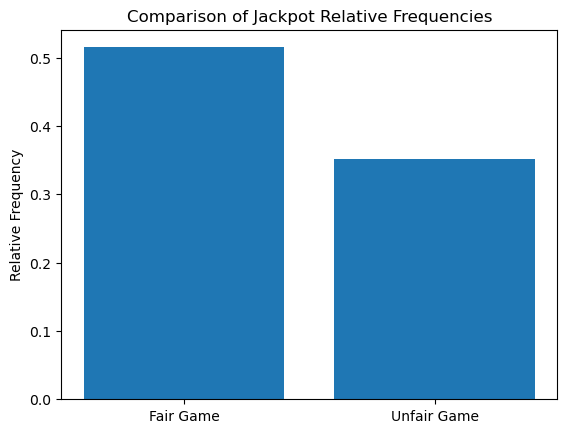

In [12]:
import matplotlib.pyplot as plt

# Bar chart data
labels = ['Fair Game', 'Unfair Game']
frequencies = [relative_frequency_fair, relative_frequency_unfair]

# Create the bar chart
plt.bar(labels, frequencies)
plt.ylabel('Relative Frequency')
plt.title('Comparison of Jackpot Relative Frequencies')
plt.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [13]:
import numpy as np
from montecarlo_simulator.montecarlo import Die

# Create three dice with faces 1 through 6
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

print("Three dice created successfully!")
print("Die 1:\n", die1.show())
print("Die 2:\n", die2.show())
print("Die 3:\n", die3.show())


Three dice created successfully!
Die 1:
       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
Die 2:
       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
Die 3:
       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [14]:
import numpy as np
from montecarlo_simulator.montecarlo import Die

# Create three dice with faces 1 through 6
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

print("Three dice created successfully!")
print("Die 1:\n", die1.show())
print("Die 2:\n", die2.show())
print("Die 3:\n", die3.show())


Three dice created successfully!
Die 1:
       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
Die 2:
       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
Die 3:
       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [15]:
# Modify die2 to be unfair with weight 5 for face 1
die2.change_weight(1, 5)
print("Die 2 modified to be unfair:\n", die2.show())


Die 2 modified to be unfair:
       weight
face        
1        5.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
from montecarlo_simulator.montecarlo import Game

# Create 5 fair dice
fair_dice = [Die(np.array([1, 2, 3, 4, 5, 6])) for _ in range(5)]

# Play a game with 5 fair dice
game_fair = Game(fair_dice)
game_fair.play(rolls=10000)
print("Game with 5 fair dice played.")



Game with 5 fair dice played.


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [17]:
# Create a game with 2 unfair dice and 3 fair dice
game_unfair = Game([die1, die2] + fair_dice[:3])
game_unfair.play(rolls=10000)
print("Game with 2 unfair dice and 3 fair dice played.")


Game with 2 unfair dice and 3 fair dice played.


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Relative frequency of jackpots for the fair game: 0.0007
Relative frequency of jackpots for the unfair game: 0.0013


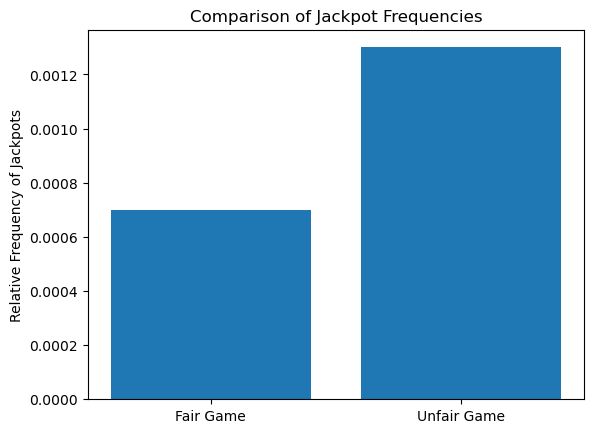

In [18]:
from montecarlo_simulator.montecarlo import Analyzer
import matplotlib.pyplot as plt

# Analyzer for the fair dice game
analyzer_fair = Analyzer(game_fair)
jackpots_fair = analyzer_fair.jackpot()
relative_frequency_fair = jackpots_fair / 10000
print(f"Relative frequency of jackpots for the fair game: {relative_frequency_fair}")

# Analyzer for the unfair dice game
analyzer_unfair = Analyzer(game_unfair)
jackpots_unfair = analyzer_unfair.jackpot()
relative_frequency_unfair = jackpots_unfair / 10000
print(f"Relative frequency of jackpots for the unfair game: {relative_frequency_unfair}")

# Plot the results in a bar chart
labels = ['Fair Game', 'Unfair Game']
frequencies = [relative_frequency_fair, relative_frequency_unfair]

plt.bar(labels, frequencies)
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.show()


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [19]:
import pandas as pd
import numpy as np
from montecarlo_simulator.montecarlo import Die

# Load the frequencies from english_letters.txt
with open('montecarlo_simulator/english_letters.txt') as f:
    letter_frequencies = {}
    for line in f:
        letter, freq = line.strip().split()
        letter_frequencies[letter] = float(freq)

# Create the die with letters A to Z and their respective weights
letters = np.array(list(letter_frequencies.keys()))
frequencies = np.array(list(letter_frequencies.values()))

die_letters = Die(letters)
for letter, freq in letter_frequencies.items():
    die_letters.change_weight(letter, freq)

print("Die of letters created successfully!")
print(die_letters.show())


Die of letters created successfully!
           weight
face             
E     529117365.0
T     390965105.0
A     374061888.0
O     326627740.0
I     320410057.0
N     313720540.0
S     294300210.0
R     277000841.0
H     216768975.0
L     183996130.0
D     169330528.0
C     138416451.0
U     117295780.0
M     110504544.0
F      95422055.0
G      91258980.0
P      90376747.0
W      79843664.0
Y      75294515.0
B      70195826.0
V      46337161.0
K      35373464.0
J       9613410.0
X       8369915.0
Z       4975847.0
Q       4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [20]:
from montecarlo_simulator.montecarlo import Game

# Create 4 identical dice with the letter die
dice = [die_letters] * 4  # Use the same die object for simplicity

# Instantiate the Game class and play
game_letters = Game(dice)
game_letters.play(rolls=1000)

print("Game with 4 dice and 1000 rolls completed.")
print(game_letters.show())


Game with 4 dice and 1000 rolls completed.
     Die_0 Die_1 Die_2 Die_3
Roll                        
0        R     A     A     O
1        C     M     F     T
2        E     N     A     P
3        B     H     G     O
4        N     L     H     I
...    ...   ...   ...   ...
995      O     G     R     F
996      O     U     R     I
997      H     A     S     A
998      N     D     D     U
999      O     S     O     N

[1000 rows x 4 columns]


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [21]:
from montecarlo_simulator.montecarlo import Analyzer

# Load scrabble words
with open('montecarlo_simulator/scrabble_words.txt') as f:
    scrabble_words = set(line.strip().lower() for line in f)

# Analyze permutations
analyzer_letters = Analyzer(game_letters)
permutations = analyzer_letters.permutation_count()

# Count permutations that are valid English words
valid_words = [perm for perm in permutations.index if ''.join(perm).lower() in scrabble_words]
valid_word_count = len(valid_words)

print(f"Number of valid English words: {valid_word_count}")
print(f"Total permutations: {len(permutations)}")


Number of valid English words: 61
Total permutations: 990


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [22]:
# Create a new game with 5 dice
dice_5 = [die_letters] * 5
game_letters_5 = Game(dice_5)
game_letters_5.play(rolls=1000)

print("Game with 5 dice and 1000 rolls completed.")
print(game_letters_5.show())

# Analyze permutations for 5 dice
analyzer_letters_5 = Analyzer(game_letters_5)
permutations_5 = analyzer_letters_5.permutation_count()

# Count valid words
valid_words_5 = [perm for perm in permutations_5.index if ''.join(perm).lower() in scrabble_words]
valid_word_count_5 = len(valid_words_5)

# Compare the results
print(f"Number of valid English words with 4 dice: {valid_word_count}")
print(f"Number of valid English words with 5 dice: {valid_word_count_5}")

# Determine which produces more words
if valid_word_count_5 > valid_word_count:
    print("Using 5 dice produces more valid words.")
else:
    print("Using 4 dice produces more valid words.")


Game with 5 dice and 1000 rolls completed.
     Die_0 Die_1 Die_2 Die_3 Die_4
Roll                              
0        T     E     V     E     A
1        A     O     W     K     D
2        P     O     I     N     N
3        O     L     H     H     N
4        N     E     G     T     W
...    ...   ...   ...   ...   ...
995      A     H     F     Y     N
996      S     S     S     D     K
997      P     M     A     N     I
998      N     E     F     S     T
999      D     E     I     E     H

[1000 rows x 5 columns]
Number of valid English words with 4 dice: 61
Number of valid English words with 5 dice: 10
Using 4 dice produces more valid words.
